p.201

In [1]:
def stdDev(X):
    """X を数のリストとする
       X の標準偏差を出力する"""
    mean = float(sum(X)) / len(X)
    tot = 0.0
    for x in X:
        tot += (x - mean) ** 2
    return (tot/len(X)) ** 0.5 # 平均との差の 2 乗根

In [2]:
def CV(X):
    mean = sum(X) / float(len(X))
    try:
        return stdDev(X) / mean
    except ZeroDivisionError:
        return float('nan')

In [3]:
class Location(object):

    def __init__(self, x, y):
        """x と y は浮動小数点数"""
        self.x = x
        self.y = y

    def move(self, deltaX, deltaY):
        """deltaX と deltaY は浮動小数点数"""
        return Location(self.x + deltaX, self.y + deltaY)

    def getX(self):
        return self.x

    def getY(self):
        return self.y

    def distFrom(self, other):
        ox = other.x
        oy = other.y
        xDist = self.x - ox
        yDist = self.y - oy
        return (xDist ** 2 + yDist ** 2) ** 0.5

    def __str__(self):
        return '<' + str(self.x) + ', ' + str(self.y) + '>'

p.202

In [4]:
class Field(object):
    
    def __init__(self):
        self.drunks = {}
        
    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('その酔っぱらいは既に追加されています')
        else:
            self.drunks[drunk] = loc
            
    def moveDrunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('その酔っぱらいはいません')
        xDist, yDist = drunk.takeStep()
        currentLocation = self.drunks[drunk]
        # Location クラスの move メソッドを用いて，新しい位置情報を得る
        self.drunks[drunk] = currentLocation.move(xDist, yDist)
        
    def getLoc(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('その酔っぱらいはいません')
        return self.drunks[drunk]

In [5]:
class Drunk(object):
    def __init__(self, name = None):
        """name を文字列とする"""
        self.name = name

    def __str__(self):
        if self != None:
            return self.name
        return '名無しさん'

In [6]:
import random

In [7]:
class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0.0, 1.0), (0.0, -1.0), (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)

p.203

In [8]:
def walk(f, d, numSteps):
    """f: Field クラスのオブジェクト
       d: Drunk クラスのオブジェクト
       numSteps: 0 以上の整数
       d を numSteps 回移動し、酔歩の初期位置と最終位置との差を出力する"""
    start = f.getLoc(d)
    for s in range(numSteps):
        f.moveDrunk(d)
    return start.distFrom(f.getLoc(d))

In [9]:
def simWalks(numSteps, numTrials, dClass):
    """numSteps: 0 以上の整数
       numTrials: 正の整数
       dClass: Drunk のサブクラス
       numSteps 回移動する酔歩を，numTrials 回シミュレートする．
       各実験の初期位置と最終位置との差をリストにして出力する"""
    Homer = dClass()
    origin = Location(0.0, 0.0)
    distances = []
    for t in range(numTrials):
        f = Field()
        f.addDrunk(Homer, origin)
        distances.append(walk(f, Homer, numTrials))
    return distances

In [10]:
def drunkTest(walkLengths, numTrials, dClass):
    """walkLengths: 0 以上の整数のシークエンス
       numTrials: 正の整数
       dClass: Drunk のサブクラス
       walkLengths の各要素を酔歩の移動回数として, numTrials 回の酔歩を
       シミュレートする simWalks を実行し、結果を出力する"""
    for numSteps in walkLengths:
        distances = simWalks(numSteps, numTrials, dClass)
        print dClass.__name__ + 'の' + str(numSteps) + '歩の酔歩'
        print ' 平均 =', sum(distances)/len(distances),\
              '変動係数 =', CV(distances)
        print ' 最大 =', max(distances), '最小 =', min(distances)

p.204

In [11]:
drunkTest((10, 100, 1000, 10000), 100, UsualDrunk)

UsualDrunkの10歩の酔歩
 平均 = 8.5527225655 変動係数 = 0.51193789958
 最大 = 18.8679622641 最小 = 0.0
UsualDrunkの100歩の酔歩
 平均 = 8.75070382082 変動係数 = 0.581410180485
 最大 = 29.4278779391 最小 = 1.41421356237
UsualDrunkの1000歩の酔歩
 平均 = 9.04138868653 変動係数 = 0.499958568774
 最大 = 22.803508502 最小 = 0.0
UsualDrunkの10000歩の酔歩
 平均 = 9.04301572808 変動係数 = 0.517780020854
 最大 = 20.8806130178 最小 = 1.41421356237


In [12]:
drunkTest((0,1), 100, UsualDrunk)

UsualDrunkの0歩の酔歩
 平均 = 9.05902410565 変動係数 = 0.488381595325
 最大 = 19.6977156036 最小 = 0.0
UsualDrunkの1歩の酔歩
 平均 = 8.48913233093 変動係数 = 0.445683744591
 最大 = 20.0 最小 = 1.41421356237


p.205

In [13]:
def simWalks(numSteps, numTrials, dClass):
    """numSteps: 0 以上の整数
       numTrials: 正の整数
       dClass: Drunk のサブクラス
       numSteps 回移動する酔歩を，numTrials 回シミュレートする。
       各実験の初期位置と最終位置との差をリストにして出力する"""
    Homer = dClass()
    origin = Location(0.0, 0.0)
    distances = []
    for t in range(numTrials):
        f = Field()
        f.addDrunk(Homer, origin)
        distances.append(walk(f, Homer, numSteps))
    return distances

In [14]:
drunkTest((0,1), 100, UsualDrunk)

UsualDrunkの0歩の酔歩
 平均 = 0.0 変動係数 = nan
 最大 = 0.0 最小 = 0.0
UsualDrunkの1歩の酔歩
 平均 = 1.0 変動係数 = 0.0
 最大 = 1.0 最小 = 1.0


In [15]:
drunkTest((10, 100, 1000, 10000), 100, UsualDrunk)

UsualDrunkの10歩の酔歩
 平均 = 2.74137389653 変動係数 = 0.536719721706
 最大 = 6.32455532034 最小 = 0.0
UsualDrunkの100歩の酔歩
 平均 = 8.45922534975 変動係数 = 0.590615447486
 最大 = 24.3310501212 最小 = 1.41421356237
UsualDrunkの1000歩の酔歩
 平均 = 25.9031652496 変動係数 = 0.555683368062
 最大 = 75.1664818919 最小 = 1.41421356237
UsualDrunkの10000歩の酔歩
 平均 = 92.7975586123 変動係数 = 0.497500121439
 最大 = 286.174771774 最小 = 19.2353840617


p.206

In [16]:
class ColdDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0.0,1.0), (0.0,-2.0), (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)

In [17]:
class EWDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices) 

In [18]:
def simAll(drunkKinds, walkLengths, numTrials):
    for dClass in drunkKinds:
        drunkTest(walkLengths, numTrials, dClass)

In [19]:
simAll((UsualDrunk, ColdDrunk, EWDrunk), (100, 1000), 10)

UsualDrunkの100歩の酔歩
 平均 = 10.9489307477 変動係数 = 0.357495557705
 最大 = 17.88854382 最小 = 4.472135955
UsualDrunkの1000歩の酔歩
 平均 = 31.5594713061 変動係数 = 0.560048494578
 最大 = 70.8378429937 最小 = 5.09901951359
ColdDrunkの100歩の酔歩
 平均 = 24.1119379452 変動係数 = 0.123130446896
 最大 = 28.6356421266 最小 = 19.1049731745
ColdDrunkの1000歩の酔歩
 平均 = 237.556811983 変動係数 = 0.130966873328
 最大 = 283.113051624 最小 = 187.171044769
EWDrunkの100歩の酔歩
 平均 = 9.8 変動係数 = 0.798008767184
 最大 = 24.0 最小 = 0.0
EWDrunkの1000歩の酔歩
 平均 = 26.2 変動係数 = 0.749842164306
 最大 = 70.0 最小 = 2.0


p.207

In [20]:
class styleIterator(object):
    def __init__(self, styles):
        self.index = 0
        self.styles = styles

    def nextStyle(self):
        result = self.styles[self.index]
        if self.index == len(self.styles) - 1:
            self.index = 0
        else:
            self.index += 1
        return result

In [21]:
def simDrunk(numTrials, dClass, walkLengths):
    meanDistances = []
    cvDistances = []
    for numSteps in walkLengths:
        print '　' + str(numSteps) + '歩のシミュレーションの開始'
        trials = simWalks(numSteps, numTrials, dClass)
        mean = sum(trials) / float(len(trials))
        meanDistances.append(mean)
        cvDistances.append(stdDev(trials) / mean)
    return (meanDistances, cvDistances)

In [22]:
import pylab

In [23]:
def simAll(drunkKinds, walkLengths, numTrials):
    pylab.figure(dpi=125)
    styleChoice = styleIterator(('b-', 'r:', 'm-.'))
    for dClass in drunkKinds:
        curStyle = styleChoice.nextStyle()
        print dClass.__name__ + 'のシミュレーションの開始'
        means, cvs = simDrunk(numTrials, dClass, walkLengths)
        cvMean = sum(cvs)/float(len(cvs))
        pylab.plot(walkLengths, means, curStyle,
                   label = dClass.__name__ +
                          u'(変動係数 = ' + str(round(cvMean, 4)) + ')')
    pylab.title(u'原点からの平均距離 ('
                + str(numTrials) + u'回の試行)')
    pylab.xlabel(u'歩数')
    pylab.ylabel(u'原点からの距離')
    pylab.legend(loc = 'best')
    pylab.semilogx()
    pylab.semilogy()

UsualDrunkのシミュレーションの開始
　10歩のシミュレーションの開始
　100歩のシミュレーションの開始
　1000歩のシミュレーションの開始
　10000歩のシミュレーションの開始
　100000歩のシミュレーションの開始
ColdDrunkのシミュレーションの開始
　10歩のシミュレーションの開始
　100歩のシミュレーションの開始
　1000歩のシミュレーションの開始
　10000歩のシミュレーションの開始
　100000歩のシミュレーションの開始
EWDrunkのシミュレーションの開始
　10歩のシミュレーションの開始
　100歩のシミュレーションの開始
　1000歩のシミュレーションの開始
　10000歩のシミュレーションの開始
　100000歩のシミュレーションの開始


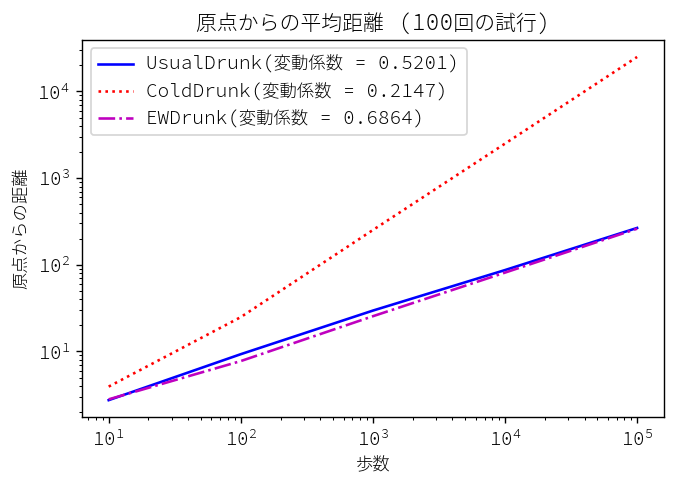

In [24]:
simAll((UsualDrunk, ColdDrunk, EWDrunk), (10, 100, 1000, 10000, 100000), 100)

p.208

In [25]:
def getFinalLocs(numSteps, numTrials, dClass):
    locs = []
    d = dClass()
    origin = Location(0, 0)
    for t in range(numTrials):
        f = Field()
        f.addDrunk(d, origin)
        for s in range(numSteps):
            f.moveDrunk(d)
        locs.append(f.getLoc(d))
    return locs

In [26]:
def plotLocs(drunkKinds, numSteps, numTrials):
    pylab.figure(dpi=125)
    styleChoice = styleIterator(('b+', 'r^', 'mo'))
    for dClass in drunkKinds:
        locs = getFinalLocs(numSteps, numTrials, dClass)
        xVals, yVals = [], []
        for l in locs:
            xVals.append(l.getX())
            yVals.append(l.getY())
        meanX = sum(xVals)/float(len(xVals))
        meanY = sum(yVals)/float(len(yVals))
        curStyle = styleChoice.nextStyle()
        pylab.plot(xVals, yVals, curStyle,
                      label = dClass.__name__ + u'の平均の位置 = <'
                      + str(meanX) + ', ' + str(meanY) + '>')
    pylab.title(u'最終到達地点 ('
                + str(numSteps) + u'歩)')
    pylab.xlabel(u'原点からの東西の位置')
    pylab.ylabel(u'原点からの南北の位置')
    pylab.legend(loc = 'lower left', numpoints = 1)

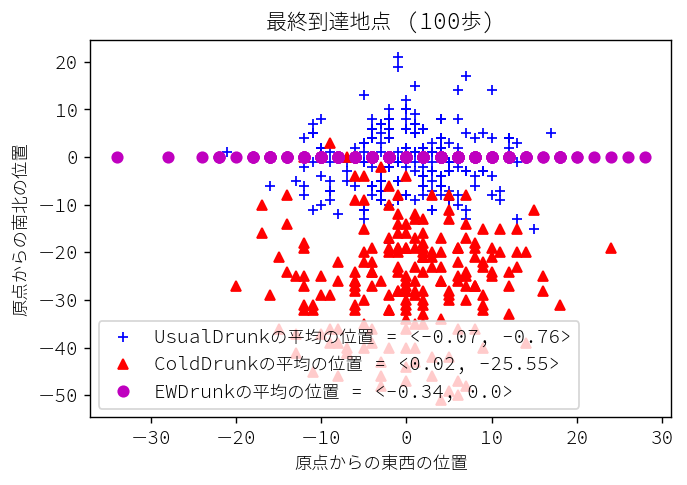

In [27]:
plotLocs((UsualDrunk, ColdDrunk, EWDrunk), 100, 200)

p.210

In [28]:
def traceWalk(drunkKinds, numSteps):
    pylab.figure(dpi=125)
    styleChoice = styleIterator(('b+', 'r^', 'mo'))
    f = Field()
    for dClass in drunkKinds:
        d = dClass()
        f.addDrunk(d, Location(0, 0))
        locs = []
        for s in range(numSteps):
            f.moveDrunk(d)
            locs.append(f.getLoc(d))
        xVals = []
        yVals = []
        for l in locs:
            xVals.append(l.getX())
            yVals.append(l.getY())
        curStyle = styleChoice.nextStyle()
        pylab.plot(xVals, yVals, curStyle,
                   label = dClass.__name__)
    pylab.title(u'移動履歴 ('
                + str(numSteps) + u'歩)')
    pylab.xlabel(u'原点からの東西の位置')
    pylab.ylabel(u'原点からの南北の位置')
    pylab.legend(loc = 'best')

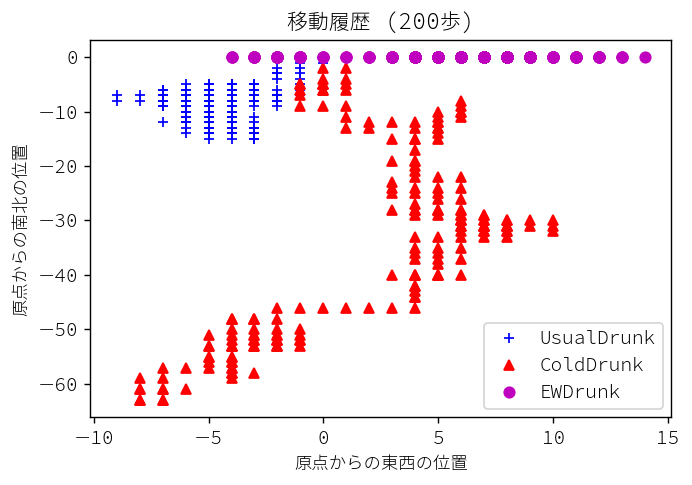

In [29]:
traceWalk((UsualDrunk, ColdDrunk, EWDrunk), 200)

p.211

In [30]:
class oddField(Field):
    def __init__(self, numHoles, xRange, yRange):
        Field.__init__(self)
        self.wormholes = {}
        for w in range(numHoles):
            x = random.randint(-xRange, xRange)
            y = random.randint(-yRange, yRange)
            newX = random.randint(-xRange, xRange)
            newY = random.randint(-yRange, yRange)
            newLoc = Location(newX, newY)
            self.wormholes[(x, y)] = newLoc

    def moveDrunk(self, drunk):
        Field.moveDrunk(self, drunk)
        x = self.drunks[drunk].getX()
        y = self.drunks[drunk].getY()
        if (x, y) in self.wormholes:
            self.drunks[drunk] = self.wormholes[(x, y)]

In [31]:
def traceWalk(drunkKinds, numSteps):
    pylab.figure(dpi=125)
    styleChoice = styleIterator(('b+', 'r^', 'mo'))
    f = oddField(1000, 100, 200)
    for dClass in drunkKinds:
        d = dClass()
        f.addDrunk(d, Location(0, 0))
        locs = []
        for s in range(numSteps):
            f.moveDrunk(d)
            locs.append(f.getLoc(d))
        xVals = []
        yVals = []
        for l in locs:
            xVals.append(l.getX())
            yVals.append(l.getY())
        curStyle = styleChoice.nextStyle()
        pylab.plot(xVals, yVals, curStyle,
                   label = dClass.__name__)
    pylab.title(u'移動履歴 ('
                + str(numSteps) + u'歩)')
    pylab.xlabel(u'原点からの東西の位置')
    pylab.ylabel(u'原点からの南北の位置')
    pylab.legend(loc = 'best')

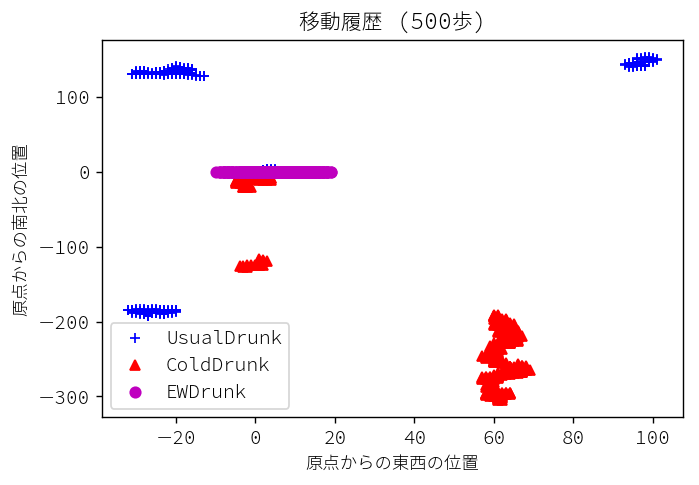

In [32]:
traceWalk((UsualDrunk, ColdDrunk, EWDrunk), 500)